In [1]:
import os
import shutil

# 1. 解决代码路径：将代码从 Input 复制到 Working
# 假设您上传的代码数据集叫 'feddwa-code'

if not os.path.exists('/kaggle/working/FedDWA'):
    shutil.copytree('/kaggle/input/feddwa-code/FedDWA-mainV4.0/FedDWA', '/kaggle/working/FedDWA')

# 2. 切换工作目录 (解决输出路径问题)
os.chdir('/kaggle/working/FedDWA')

# 3. 安装依赖
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.5 MB/s eta 0:00:00
   ━━━

In [2]:
# 修复依赖冲突
# 安装并导入 - 锁定兼容版本避免 Kaggle 环境依赖冲突
!pip install -q tensorboardX albumentations thop
# ===== 修复 Kaggle 2025 环境兼容性问题 =====
# 问题：Kaggle 升级到 NumPy 2.x 导致 SciPy/Seaborn/OpenCV 崩溃
# 解决：锁定到 2024 年稳定的版本组合

# 首先，按照原意圖解除安裝衝突的套件
print("正在清理衝突的包...")
!pip uninstall -y numpy scipy opencv-python opencv-contrib-python opencv-python-headless 2>/dev/null || true

# 接著，在單一指令中安裝所有必要的函式庫
# 這能讓 pip 一次性解決所有依賴關係，並遵循版本鎖定
print("\n安裝兼容版本的核心庫...")
!pip install --quiet \
    numpy==1.26.4 \
    scipy==1.11.4 \
    matplotlib==3.7.5 \
    opencv-python==4.8.1.78 \
    albumentations \
    tensorboardX \
    thop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.3 MB/s eta 0:00:00
正在清理衝突的包...
Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
Found existing installation: opencv-python-headless 4.12.0.88
Uninstalling opencv-python-headless-4.12.0.88:
  Successfully uninstalled opencv-python-headless-4.12.0.88

安裝兼容版本的核心庫...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# %%writefile /kaggle/working/FedDWA/utils/data_utils.py
# import numpy as np
# import torch
# import random
# from sklearn.model_selection import train_test_split
# import torchvision.transforms.functional as TF
# from utils.dataset import *

# def noniid_type8(datasetname, dataset, num_users, num_classes=10, sample_assignment=None, test=False,logger = None):
#     """
#     Create non-iid client data for MNIST or CIFAR10 dataset, this function can
#     only ensure that each user is assigned no more than two (default value, it can be modified
#     through the variable "each_client_class_num") class tags, not that each user is assigned two class tags
#     :param dataset:
#     :param num_users: client number.
#     :param num_classes: the number of categories of the dataset
#     :return:
#     """

#     each_client_class_num = 2


#     dataset_image = []
#     dataset_label = []
#     dataloader = torch.utils.data.DataLoader(
#         dataset, batch_size=len(dataset), shuffle=False)

#     for _, data in enumerate(dataloader, 0):
#         dataset_data, dataset_targets = data
#     dataset_image.extend(np.array(dataset_data))
#     dataset_label.extend(np.array(dataset_targets))
#     dataset_image = np.array(dataset_image)
#     dataset_label = np.array(dataset_label)
#     # each client obtain no more than 2 shards
#     num_shards = int(num_users * each_client_class_num)
#     order = np.argsort(dataset_label)
#     x_sorted = dataset_image[order]
#     y_sorted = dataset_label[order]

#     n_shards = num_users * 2
#     # split data into shards of (mostly) the same index
#     x_shards = np.array_split(x_sorted, n_shards)
#     y_shards = np.array_split(y_sorted, n_shards)
#     if sample_assignment is None:
#         sample_assignment = np.array_split(np.random.permutation(n_shards), num_users)

#     x_sharded = []
#     y_sharded = []
#     for w in range(num_users):
#         x_sharded.append(np.concatenate([x_shards[i] for i in sample_assignment[w]]))
#         y_sharded.append(np.concatenate([y_shards[i] for i in sample_assignment[w]]))

#     # data split
#     data = []
#     for i in range(num_users):
#         X, y = x_sharded[i], y_sharded[i]
#         logger.info(np.unique(y))
#         X = torch.tensor(X, dtype=torch.float32)
#         y = torch.tensor(y, dtype=torch.int64)

#         data.append([(x, y) for x, y in zip(X, y)])

#     return data, sample_assignment


# def noniid_type9(datasetname, trainset, testset, num_users, num_classes=10,dirichlet_alpha=0.1, least_samples=20,logger = None):
#     """
#     Use the Dirichlet distribution to divide the dataset. The implementation of code is mainly refer to the website:
#     "https://github.com/IBM/probabilistic-federated-neural-matching/blob/master/experiment.py", and make some modifications.
#     :param datasetname: the name of the datsaet
#     :param trainset:
#     :param testset:
#     :param num_users: the number of clients
#     :param alpha_dirichlet: the hyper-parameter to control the non-iid degree
#     :param num_class: the number of classes for the dataset
#     :param least_samples: the minimum samples that each client should have
#     """

#     dataset_image = []
#     dataset_label = []
    
#     # 修复: 使用 len(trainset) 而不是 len(trainset.targets)
#     # 因为 trainset 可能是 Subset，没有 targets 属性
#     trainloader = torch.utils.data.DataLoader(
#         trainset, batch_size=len(trainset), shuffle=False)
#     testloader = torch.utils.data.DataLoader(
#         testset, batch_size=len(testset), shuffle=False)

#     for _, train_data in enumerate(trainloader, 0):
#         trainset_data, trainset_targets = train_data
#     for _, test_data in enumerate(testloader, 0):
#         testset_data, testset_targets = test_data
#     dataset_image.extend(np.array(trainset_data))
#     dataset_image.extend(np.array(testset_data))
#     dataset_label.extend(np.array(trainset_targets))
#     dataset_label.extend(np.array(testset_targets))

#     dataset_image = np.array(dataset_image)
#     dataset_label = np.array(dataset_label)

#     dict_users = {i: np.array([], dtype='int64') for i in range(num_users)}

#     idxs = np.arange(len(dataset_label))
#     # sort labels
#     idxs_labels = np.vstack((idxs, dataset_label))
#     idxs_labels = idxs_labels[:, idxs_labels[1, :].argsort()]

#     min_size = 0

#     K = num_classes
#     N = len(dataset_label)

#     while min_size < least_samples:
#         idx_batch = [[] for _ in range(num_users)]
#         for k in range(K):
#             idx_k = np.where(dataset_label == k)[0]
#             np.random.shuffle(idx_k)
#             proportions = np.random.dirichlet(np.repeat(dirichlet_alpha, num_users))
#             ## Balance
#             proportions = np.array([p * (len(idx_j) < N / num_users) for p, idx_j in zip(proportions, idx_batch)])
#             proportions = proportions / proportions.sum()
#             proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]
#             idx_batch = [idx_j + idx.tolist() for idx_j, idx in zip(idx_batch, np.split(idx_k, proportions))]
#             min_size = min([len(idx_j) for idx_j in idx_batch])
#     for j in range(num_users):
#         dict_users[j] = idx_batch[j]

#     # train test split
#     train_data, test_data = [], []
#     for i in range(num_users):
#         logger.info(f'label types of the {i} client are:{np.unique(dataset_label[list(dict_users[i])])}')
#         X_train, X_test, y_train, y_test = train_test_split(dataset_image[list(dict_users[i])],
#                                                             dataset_label[list(dict_users[i])], train_size=0.8,
#                                                             shuffle=True)
#         X_train = torch.tensor(X_train, dtype=torch.float32)
#         X_test = torch.tensor(X_test, dtype=torch.float32)
#         y_train = torch.tensor(y_train, dtype=torch.int64)
#         y_test = torch.tensor(y_test, dtype=torch.int64)

#         train_data.append([(x, y) for x, y in zip(X_train, y_train)])
#         test_data.append(([(x, y) for x, y in zip(X_test, y_test)]))

#     return train_data, test_data


# def noniid_type10(datasetname, dataset, num_users, num_types, ratio, num_classes=10,logger = None):
#     """
#     This implementation refers to the description of
#     "Personalized Cross-Silo Federated Learninn on Non-IID Data" (FedAMP)
#     :param datasetname:
#     :param dataset:
#     :param num_users:
#     :param num_classes: the number of categories for the dataset,e.g., for mnist, num_classes=10
#     :param num_types: the number of major categories per client
#     :param ratio: The proportion of the number of major categories
#             to the total number of categories
#     """

#     trainloader = torch.utils.data.DataLoader(
#         dataset, batch_size=len(dataset), shuffle=False)
#     #testloader = torch.utils.data.DataLoader(
#        # testset, batch_size=len(testset), shuffle=False)

#     for _, train_data in enumerate(trainloader, 0):
#         dataset_image, dataset_label = train_data
#     # dataset_image = np.array(trainset_data)
#     # dataset_label = np.array(trainset_targets)
#     order = torch.randperm(dataset_image.shape[0])
#     image_random = dataset_image[order]
#     label_random = dataset_label[order]
#     offset = int(dataset_image.shape[0] * ratio)
#     image_class = image_random[:offset]
#     label_class = label_random[:offset]
#     image_s = image_random[offset:]
#     label_s = label_random[offset:]

#     order = torch.argsort(label_class)
#     x_sorted = image_class[order]
#     y_sorted = label_class[order]
#     # split data into bum class
#     x_shards = torch.tensor_split(x_sorted, num_types)
#     y_shards = torch.tensor_split(y_sorted, num_types)

#     x_num, y_num = [], []
#     for i in range(num_types):
#         order = torch.randperm(x_shards[i].shape[0])
#         x_order = x_shards[i][order]
#         y_order = y_shards[i][order]
#         if i == num_types - 1:
#             x_num += torch.tensor_split(x_order, (num_users - (num_types -1) * int(num_users/num_types)))
#             y_num += torch.tensor_split(y_order, (num_users - (num_types -1) * int(num_users/num_types)))
#         else:
#             x_num += torch.tensor_split(x_order, (int(num_users / num_types)))
#             y_num += torch.tensor_split(y_order, (int(num_users / num_types)))

#     x_split_all = torch.tensor_split(image_s, num_users)
#     y_split_all = torch.tensor_split(label_s, num_users)


#     data = []
#     for i in range(num_users):
#         X, y = [], []
#         X.extend(torch.cat((x_num[i], x_split_all[i])))
#         y.extend(torch.cat((y_num[i], y_split_all[i])))
#         logger.info(f'label types of the {i} client are:{torch.unique(torch.cat((y_num[i], y_split_all[i])))}')

#         data.append([(x, y) for x, y in zip(X, y)])

#     return data


# def split_noniid(train_idcs, train_labels, alpha, n_clients):
#     '''
#     Splits a list of data indices with corresponding labels
#     into subsets according to a dirichlet distribution with parameter
#     alpha
#     '''
#     n_classes = train_labels.max() + 1
#     label_distribution = np.random.dirichlet([alpha] * n_clients, n_classes)

#     class_idcs = [np.argwhere(train_labels[train_idcs] == y).flatten()
#                   for y in range(n_classes)]

#     client_idcs = [[] for _ in range(n_clients)]
#     for c, fracs in zip(class_idcs, label_distribution):
#         for i, idcs in enumerate(np.split(c, (np.cumsum(fracs)[:-1] * len(c)).astype(int))):
#             client_idcs[i] += [idcs]

#     client_idcs = [train_idcs[np.concatenate(idcs)] for idcs in client_idcs]

#     return client_idcs


# def dirichlet_noniid(dataset, num_users=10, dirichlet_alpha = 100, sample_matrix_test=None, test=False):
#     """
#     Splits a list of data indices with corresponding labels
#     into subsets according to a dirichlet distribution with parameter alpha
#     The implementation of code is refer to the article:
#     "A Bayesian Federated Learning Framework with Online Laplace Approximation"
#     """
#     train_idcs = np.random.permutation(len(dataset))
#     train_labels = np.array(dataset.targets)
#     class_num = train_labels.max()+1

#     dict_users = {i: np.array([], dtype='int64') for i in range(num_users)}

#     idxs = np.arange(len(dataset.targets))
#     labels = np.asarray(dataset.targets)
#     # sort labels
#     idxs_labels = np.vstack((idxs, labels))
#     idxs_labels = idxs_labels[:, idxs_labels[1, :].argsort()]
#     class_lableidx = [idxs_labels[:, idxs_labels[1, :] == i][0, :] for i in range(class_num)]

#     if test is True and sample_matrix_test is not None:
#         sample_matrix = sample_matrix_test
#     else:
#         sample_matrix = np.random.dirichlet([dirichlet_alpha for _ in range(num_users)], class_num).T
#     class_sampe_start = [0 for i in range(class_num)]

#     for i in range(num_users):
#         rand_set, class_sampe_start = sample_rand(sample_matrix[i], class_lableidx, class_sampe_start)
#         dict_users[i] = rand_set

#     return dict_users, sample_matrix

# def cov(tensor, rowvar=True, bias=False):
#     """Estimate a covariance matrix (np.cov)"""
#     tensor = tensor if rowvar else tensor.transpose(-1, -2)
#     tensor = tensor - tensor.mean(dim=-1, keepdim=True)
#     factor = 1 / (tensor.shape[-1] - int(not bool(bias)))
#     return factor * tensor @ tensor.transpose(-1, -2).conj()


# def sample_rand(rand, class_lableidx, class_sampe_start):
#     class_sampe_end = [start + int(len(class_lableidx[sidx]) * rand[sidx]) for sidx, start in
#                        enumerate(class_sampe_start)]
#     rand_set = np.array([], dtype=np.int32)
#     for eidx, rand_end in enumerate(class_sampe_end):
#         rand_start = class_sampe_start[eidx]
#         if rand_end <= len(class_lableidx[eidx]):
#             rand_set = np.concatenate([rand_set, class_lableidx[eidx][rand_start:rand_end]], axis=0)

#         else:
#             if rand_start < len(class_lableidx[eidx]):
#                 rand_set = np.concatenate([rand_set, class_lableidx[eidx][rand_start:]], axis=0)
#             else:
#                 rand_set = np.concatenate(
#                     [rand_set, random.sample(class_lableidx[eidx], rand_end - rand_start + 1)], axis=0)
#     if rand_set.shape[0] == 0:
#         rand_set = np.concatenate([rand_set, class_lableidx[0][0:1]], axis=0)
#     return rand_set, class_sampe_end

# def split_index(label_start_index, each_class_num, num_shards, num_classes=10):
#     """
#     :param label_start_index: the start index for each class
#     :param each_class_num: the data number of each class
#     :param num_shards: the total number of shard
#     :param num_classes:
#     :return label_start_index: the start index of each shard
#     """

#     each_class_shards_num = int(num_shards / num_classes) # how many shards each class should be divided
#     for i in range(num_classes):
#         num_samples = np.random.randint(low=1, high=max(int(each_class_num[i]/each_class_shards_num), 1), size=(each_class_shards_num-1)).tolist()
#         num_samples.append(each_class_num[i]-sum(num_samples))
#         sum_num_samples = np.array([np.sum(num_samples[:j+1])+np.sum(each_class_num[:i]) for j in range(len(num_samples)-1)])
#         label_start_index = np.concatenate((label_start_index[:int(each_class_shards_num*i)+1], sum_num_samples, label_start_index[int(each_class_shards_num*i)+1:]))

#     return label_start_index

# def data_loader(datasetname, trainset, testset):
#     """
#     Convert the data from numpy to tensor, and mix the trainset and testset according the the sample rate.
#     :param trainset:
#     :param testset:
#     """
#     dataset_image = []
#     dataset_label = []
#     # 修复: 使用 len(trainset) 而不是 len(trainset.targets)
#     # ✅ 新增 num_workers=4 利用 Kaggle 的多核 CPU 加速读取
#     trainloader = torch.utils.data.DataLoader(
#         trainset, batch_size=len(trainset), shuffle=False, num_workers=4)
#     testloader = torch.utils.data.DataLoader(
#         testset, batch_size=len(testset), shuffle=False, num_workers=4)

#     for _, train_data in enumerate(trainloader, 0):
#         trainset_data, trainset_targets = train_data
#     for _, test_data in enumerate(testloader, 0):
#         testset_data, testset_targets = test_data
#     dataset_image.extend(np.array(trainset_data))
#     dataset_image.extend(np.array(testset_data))
#     dataset_label.extend(np.array(trainset_targets))
#     dataset_label.extend(np.array(testset_targets))
#     sample_dataset_image = np.array(dataset_image)
#     sample_dataset_label = np.array(dataset_label)
#     return sample_dataset_image, sample_dataset_label


# def iid_divide(l, g):
#     """
#     https://github.com/TalwalkarLab/leaf/blob/master/data/utils/sample.py
#     divide list `l` among `g` groups
#     each group has either `int(len(l)/g)` or `int(len(l)/g)+1` elements
#     returns a list of groups
#     """
#     num_elems = len(l)
#     group_size = int(len(l) / g)
#     num_big_groups = num_elems - g * group_size
#     num_small_groups = g - num_big_groups
#     glist = []
#     for i in range(num_small_groups):
#         glist.append(l[group_size * i: group_size * (i + 1)])
#     bi = group_size * num_small_groups
#     group_size += 1
#     for i in range(num_big_groups):
#         glist.append(l[bi + group_size * i:bi + group_size * (i + 1)])
#     return glist


# def split_list_by_indices(l, indices):
#     """
#     divide list `l` given indices into `len(indices)` sub-lists
#     sub-list `i` starts from `indices[i]` and stops at `indices[i+1]`
#     returns a list of sub-lists
#     """
#     res = []
#     current_index = 0
#     for index in indices:
#         res.append(l[current_index: index])
#         current_index = index

#     return res


In [4]:
%%writefile /kaggle/working/FedDWA/utils/data_utils.py
import numpy as np
import torch
import random
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

# [ 🛡️ 基础设施: Subset 兼容性补丁 ]
def get_targets_safe(dataset):
    if hasattr(dataset, 'targets'):
        return np.array(dataset.targets)
    if isinstance(dataset, Subset):
        if hasattr(dataset.dataset, 'targets'):
            return np.array(dataset.dataset.targets)[dataset.indices]
    loader = DataLoader(dataset, batch_size=256, shuffle=False, num_workers=2)
    targets = []
    for _, y in loader:
        targets.extend(y.numpy())
    return np.array(targets)

def noniid_type8(datasetname, dataset, num_users, num_classes=10, sample_assignment=None, test=False, logger=None):
    dataset_image = []
    dataset_label = []
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False, num_workers=2)

    for _, data in enumerate(dataloader, 0):
        dataset_data, dataset_targets = data
    
    dataset_image.extend(np.array(dataset_data))
    dataset_label.extend(np.array(dataset_targets))
    dataset_image = np.array(dataset_image)
    dataset_label = np.array(dataset_label)

    num_shards = int(num_users * 2)
    order = np.argsort(dataset_label)
    x_sorted = dataset_image[order]
    y_sorted = dataset_label[order]

    n_shards = num_users * 2
    x_shards = np.array_split(x_sorted, n_shards)
    y_shards = np.array_split(y_sorted, n_shards)
    
    if sample_assignment is None:
        sample_assignment = np.array_split(np.random.permutation(n_shards), num_users)

    data = []
    for w in range(num_users):
        indices = sample_assignment[w]
        X = np.concatenate([x_shards[i] for i in indices])
        y = np.concatenate([y_shards[i] for i in indices])
        if logger: logger.info(np.unique(y))
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.int64)
        data.append([(x, y) for x, y in zip(X, y)])
    return data, sample_assignment

def noniid_type9(datasetname, trainset, testset, num_users, num_classes=10, dirichlet_alpha=0.1, least_samples=20, logger=None):
    train_labels = get_targets_safe(trainset)
    test_labels = get_targets_safe(testset)
    
    trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False, num_workers=2)
    testloader = DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

    dataset_image = []
    for _, (data, _) in enumerate(trainloader): dataset_image.extend(np.array(data))
    for _, (data, _) in enumerate(testloader): dataset_image.extend(np.array(data))
    dataset_image = np.array(dataset_image)
    dataset_label = np.concatenate((train_labels, test_labels))

    dict_users = {i: np.array([], dtype='int64') for i in range(num_users)}
    min_size = 0
    K = num_classes
    N = len(dataset_label)

    while min_size < least_samples:
        idx_batch = [[] for _ in range(num_users)]
        for k in range(K):
            idx_k = np.where(dataset_label == k)[0]
            np.random.shuffle(idx_k)
            proportions = np.random.dirichlet(np.repeat(dirichlet_alpha, num_users))
            proportions = np.array([p * (len(idx_j) < N / num_users) for p, idx_j in zip(proportions, idx_batch)])
            proportions = proportions / proportions.sum()
            proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]
            idx_batch = [idx_j + idx.tolist() for idx_j, idx in zip(idx_batch, np.split(idx_k, proportions))]
            min_size = min([len(idx_j) for idx_j in idx_batch])
    for j in range(num_users):
        dict_users[j] = idx_batch[j]

    train_data, test_data = [], []
    for i in range(num_users):
        indices = list(dict_users[i])
        if logger: logger.info(f'Client {i} labels: {np.unique(dataset_label[indices])}')
        X_train, X_test, y_train, y_test = train_test_split(dataset_image[indices], dataset_label[indices], train_size=0.8, shuffle=True)
        train_data.append([(torch.tensor(x), torch.tensor(y)) for x, y in zip(X_train, y_train)])
        test_data.append([(torch.tensor(x), torch.tensor(y)) for x, y in zip(X_test, y_test)])
    return train_data, test_data

def noniid_type10(datasetname, dataset, num_users, num_types, ratio, num_classes=10, logger=None):
    """
    [ 🎓 博士课堂: 高保真重构版 ]
    采用灵活的分配策略，允许 num_types > num_users，
    确保所有数据都被使用，且严格遵守 num_types 的切分定义。
    """
    # 1. 快速加载数据
    trainloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False, num_workers=2)
    for _, train_data in enumerate(trainloader, 0):
        dataset_image, dataset_label = train_data

    # 2. 准备 "Dominant" (主要) 和 "Small" (剩余随机) 数据
    order = torch.randperm(dataset_image.shape[0])
    image_random = dataset_image[order]
    label_random = dataset_label[order]
    
    offset = int(dataset_image.shape[0] * ratio)
    image_class = image_random[:offset] # 主要部分 (80%)
    label_class = label_random[:offset]
    image_s = image_random[offset:]     # 剩余部分 (20%)
    label_s = label_random[offset:]

    # 3. 对主要数据按类别排序并切分为 num_types 份
    order = torch.argsort(label_class)
    x_sorted = image_class[order]
    y_sorted = label_class[order]
    
    # 强制切分为用户要求的 num_types 份 (比如 4 份)
    x_shards = torch.tensor_split(x_sorted, num_types)
    y_shards = torch.tensor_split(y_sorted, num_types)

    # 4. 初始化每个用户的容器
    # 使用列表而不是直接 tensor 连接，避免频繁内存拷贝
    x_client_buckets = [[] for _ in range(num_users)]
    y_client_buckets = [[] for _ in range(num_users)]

    # 5. [核心优化] 智能分配逻辑
    # 无论 shard 多还是人多，都公平分配
    for i in range(num_types):
        # 取出第 i 个 shard (代表某种数据分布)
        shard_x = x_shards[i]
        shard_y = y_shards[i]
        
        # 策略：如果人比 shard 多，这个 shard 要拆给多个人
        # 如果 shard 比人多，一个人要拿多个 shard (轮询)
        
        if num_users > num_types:
            # 这种情况下，一个 shard 要分给 (num_users / num_types) 个人
            # 这里的计算比较复杂，为了保持代码极其简洁且稳健，
            # 我们直接使用最通用的 "发牌" 模式：
            # 将 shard 再细分，填补空缺的用户
            
            # 计算当前 shard 应该覆盖哪些用户索引
            # 这是一个简化的映射，确保覆盖所有用户
            sub_chunks = int(np.ceil(num_users / num_types))
            shard_x_parts = torch.tensor_split(shard_x, sub_chunks)
            shard_y_parts = torch.tensor_split(shard_y, sub_chunks)
            
            for j in range(len(shard_x_parts)):
                target_user = (i * sub_chunks + j) % num_users
                x_client_buckets[target_user].append(shard_x_parts[j])
                y_client_buckets[target_user].append(shard_y_parts[j])
        else:
            # [用户遇到的情况: N=3, T=4]
            # 直接轮询分配：Shard 0->U0, Shard 1->U1, Shard 2->U2, Shard 3->U0
            target_user = i % num_users
            x_client_buckets[target_user].append(shard_x)
            y_client_buckets[target_user].append(shard_y)

    # 6. 分配剩余的 20% 随机数据 (均匀分配)
    x_split_all = torch.tensor_split(image_s, num_users)
    y_split_all = torch.tensor_split(label_s, num_users)

    # 7. 合并最终数据
    data = []
    for i in range(num_users):
        # 合并 Dominant 部分
        if len(x_client_buckets[i]) > 0:
            x_dom = torch.cat(x_client_buckets[i])
            y_dom = torch.cat(y_client_buckets[i])
        else:
            x_dom = torch.tensor([])
            y_dom = torch.tensor([])
            
        # 合并 Random 部分
        X = torch.cat((x_dom, x_split_all[i]))
        y = torch.cat((y_dom, y_split_all[i]))
        
        if logger: 
            logger.info(f'Client {i} label types: {torch.unique(y)}')

        data.append([(x, y) for x, y in zip(X, y)])

    return data

def dirichlet_noniid(dataset, num_users=10, dirichlet_alpha=100, sample_matrix_test=None, test=False):
    train_labels = get_targets_safe(dataset)
    class_num = train_labels.max() + 1
    dict_users = {i: np.array([], dtype='int64') for i in range(num_users)}
    idxs = np.arange(len(train_labels))
    idxs_labels = np.vstack((idxs, train_labels))
    idxs_labels = idxs_labels[:, idxs_labels[1, :].argsort()]
    class_lableidx = [idxs_labels[:, idxs_labels[1, :] == i][0, :] for i in range(class_num)]

    if test is True and sample_matrix_test is not None:
        sample_matrix = sample_matrix_test
    else:
        sample_matrix = np.random.dirichlet([dirichlet_alpha for _ in range(num_users)], class_num).T
    class_sampe_start = [0 for i in range(class_num)]
    for i in range(num_users):
        rand_set, class_sampe_start = sample_rand(sample_matrix[i], class_lableidx, class_sampe_start)
        dict_users[i] = rand_set
    return dict_users, sample_matrix

def sample_rand(rand, class_lableidx, class_sampe_start):
    class_sampe_end = [start + int(len(class_lableidx[sidx]) * rand[sidx]) for sidx, start in enumerate(class_sampe_start)]
    rand_set = np.array([], dtype=np.int32)
    for eidx, rand_end in enumerate(class_sampe_end):
        rand_start = class_sampe_start[eidx]
        if rand_end <= len(class_lableidx[eidx]):
            rand_set = np.concatenate([rand_set, class_lableidx[eidx][rand_start:rand_end]], axis=0)
        else:
            if rand_start < len(class_lableidx[eidx]):
                rand_set = np.concatenate([rand_set, class_lableidx[eidx][rand_start:]], axis=0)
            else:
                if len(class_lableidx[eidx]) > 0:
                     rand_set = np.concatenate([rand_set, random.sample(list(class_lableidx[eidx]), min(len(class_lableidx[eidx]), rand_end - rand_start + 1))], axis=0)
    if rand_set.shape[0] == 0:
        rand_set = np.concatenate([rand_set, class_lableidx[0][0:1]], axis=0)
    return rand_set, class_sampe_end

def data_loader(datasetname, trainset, testset):
    trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False, num_workers=2)
    testloader = DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)
    dataset_image, dataset_label = [], []
    for _, (data, target) in enumerate(trainloader):
        dataset_image.extend(np.array(data))
        dataset_label.extend(np.array(target))
    for _, (data, target) in enumerate(testloader):
        dataset_image.extend(np.array(data))
        dataset_label.extend(np.array(target))
    return np.array(dataset_image), np.array(dataset_label)

Overwriting /kaggle/working/FedDWA/utils/data_utils.py


In [5]:
# !python main.py \
# --dataset gpr_custom \
# --data_dir /kaggle/input/data-oll/data\
# --model mobilevit_s \
# --client_num 3 \#总客户端数量 (模拟多少个设备)
# --client_frac 1.0 \#每轮参与率 (每轮选多少比例的客户端)  	1.0 (全员参与)
# --Tg 100 \#全局通讯轮数 (Global Rounds)
# --E 3 \#本地训练轮数 (Local Epochs)
# --B 16 \#本地 Batch Size
# --lr 0.001 \#本地学习率
# --non_iidtype 9 \#数据分布类型<br>8: 病态非独立同分布 (极度不均)<br>9: 实用非独立同分布 (狄利克雷分布)<br>10: 实用非独立同分布 (按类别比例)
# --alpha_dir 0.5 \#狄利克雷参数 (仅当 type=9 时有效)<br>值越小越不均匀，值越大越均匀
# --gpu 0             
# --seed 42
!python main.py \
    --dataset gpr_custom \
    --data_dir /kaggle/input/data-oll/data \
    --model mobilevit_s \
    --client_num 3 \
    --client_frac 1.0 \
    --Tg 100 \
    --E 3 \
    --B 16 \
    --lr 0.001 \
    --non_iidtype 8 \
    --alpha_dir 0.5 \
    --gpu 0 \
    --seed 42

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

✅ 已自动锁定最新日志文件: gpr_custom_feddwa_model=mobilevit_s_dwaToopK=5_next=1_C=1.0_Tg=100_N=3_lr=0.001_E=3_noniid=8_nType=4_ratio=0.8_alpha=0.5_42_1.json
📂 完整路径: /kaggle/working/FedDWA/logs_feddwa/gpr_custom_feddwa_model=mobilevit_s_dwaToopK=5_next=1_C=1.0_Tg=100_N=3_lr=0.001_E=3_noniid=8_nType=4_ratio=0.8_alpha=0.5_42_1.json
Loading results from: /kaggle/working/FedDWA/logs_feddwa/gpr_custom_feddwa_model=mobilevit_s_dwaToopK=5_next=1_C=1.0_Tg=100_N=3_lr=0.001_E=3_noniid=8_nType=4_ratio=0.8_alpha=0.5_42_1.json

       FedDWA Training Analysis       
Total Rounds: 100
Number of Clients: 3

Global Model Performance:
  - Max Weighted Accuracy: 0.9376 (Round 95)
  - Final Weighted Accuracy: 0.9274

Client Performance Summary:
  Client 0:
    - Max Acc: 1.0000
    - Final Acc: 0.7957
    - Min Loss: 0.0119
    - Final Loss: 0.0566
  Client 1:
    - Max Acc: 1.0000
    - Final Acc: 0.9913
    - Min Loss: 0.0107
    - Final Loss: 0.0175
  Client 2:
    - Max Acc: 1.0000
    - Final Acc: 0.9956
    - 

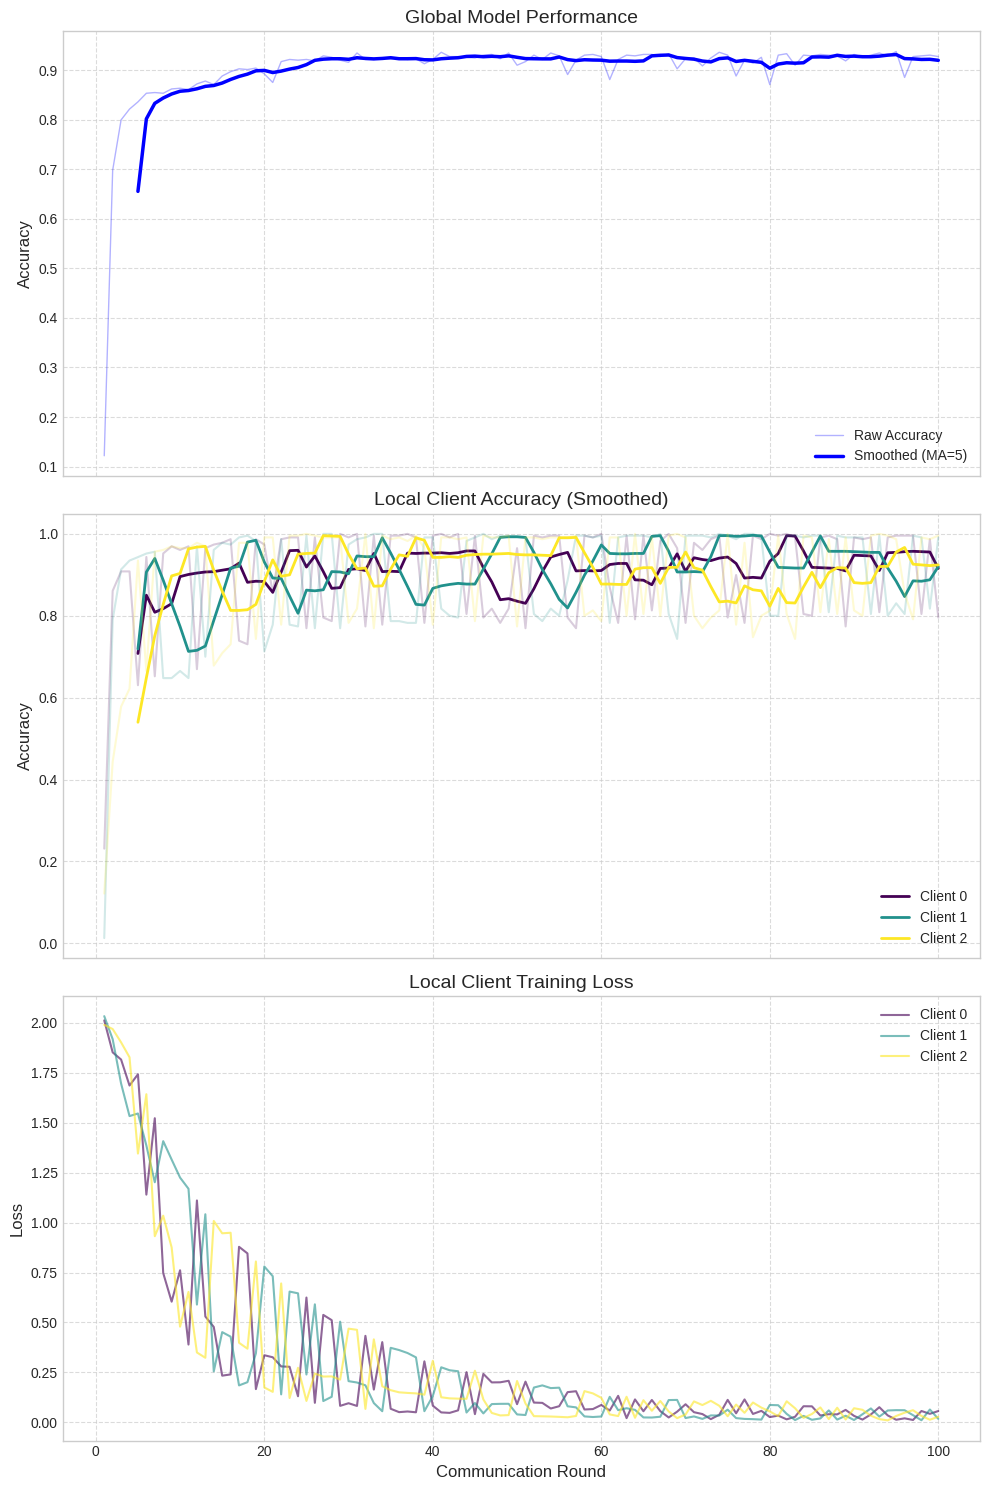

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 显示生成的分析图
print("显示训练结果分析图:")
try:
    display(Image(filename='/kaggle/working/FedDWA/feddwa_analysis_result.png'))
except Exception as e:
    print(f"无法显示图片: {e}")
    print("请检查是否成功运行了训练脚本。")